# Daten Visualisieung

Datenvisualisierung ist ein wichtiger Bestandteil der Datenanalyse, der es ermöglicht, Muster, Trends und Beziehungen in den Daten visuell darzustellen. In Python gibt es verschiedene Bibliotheken, die zur Visualisierung von Daten verwendet werden können, darunter Pandas, Matplotlib und Seaborn.

- **Pandas**: bieter einfachen Visualisierung von Daten,

- **Matplotlib**: eine umfangreiche Bibliothek zur Erstellung von Grafiken und Diagrammen in Python. Es bietet eine Vielzahl von Funktionen zur Anpassung von Grafiken und zur Erstellung verschiedener Arten von Plots, einschließlich Linienplots, Histogrammen, Scatterplots und Balkendiagrammen.

- **Seaborn**: eine weitere Bibliothek zur Datenvisualisierung, die auf Matplotlib aufbaut und die Erstellung ansprechender und komplexerer Diagramme vereinfacht. Es bietet eine höhere Abstraktionsebene und ermöglicht die Erstellung von Diagrammen mit wenigen Zeilen Code.


## 1 - Pandas

[<img src="bilder/pandas.png"  width="400" height="300"  title="Pandas Visualisierung">](https://pandas.pydata.org/docs/user_guide/visualization.html)


In [1]:
# wir wollen unseren Pickle jetzt lesen
import pickle

with open('df.pkl', 'rb') as file:
    df = pickle.load(file)

/tmp/ipykernel_4681/3553811520.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  df = pickle.load(file)


In [3]:
# die "head" Methode erstellt ein neuen df
# die "T" transponiert
df.head(10).T

row_id,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
country,C,C,A,A,D,A,C,D,G,C
is_urban,False,True,False,False,False,True,False,True,False,False
age,18,30,20,61,26,36,35,33,42,32
female,True,True,True,False,True,True,False,True,False,True
married,True,True,True,True,True,True,True,True,False,True
religion,P,P,Q,Q,X,Q,P,Q,X,P
relationship_to_hh_head,Other,Other,Spouse,Head,Spouse,Spouse,Head,Spouse,Head,Spouse
education_level,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0
literacy,True,True,True,False,True,False,False,True,True,True
can_add,True,True,True,True,False,True,True,True,True,True


<Axes: xlabel='row_id'>

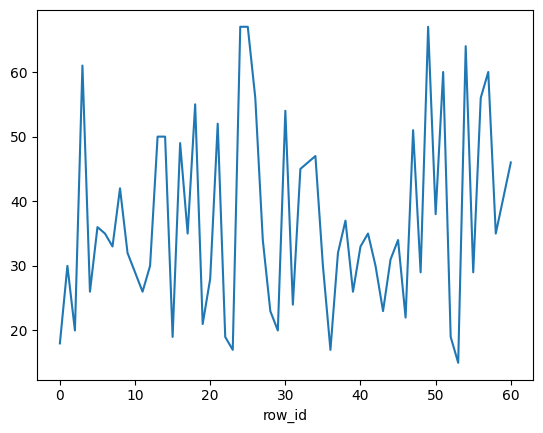

In [5]:
# Linie Abbildung von ein Teil unseres dfs
df['age'].loc[:60].plot()

<Axes: >

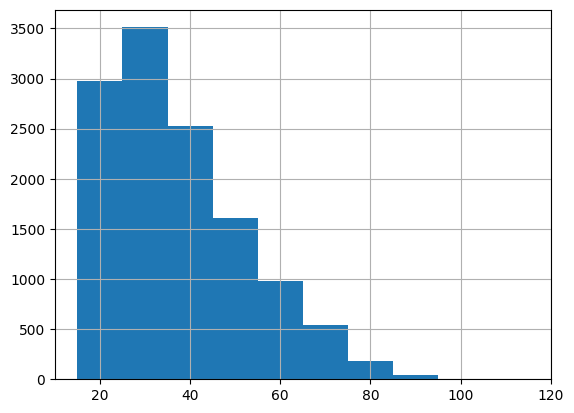

In [6]:
# Histogramm
df['age'].hist()

In [7]:
df.groupby('gender')[['is_urban', 	'employed_last_year']].sum()

,is_urban,employed_last_year
gender,,
female,2329,3154
male,1771,4126


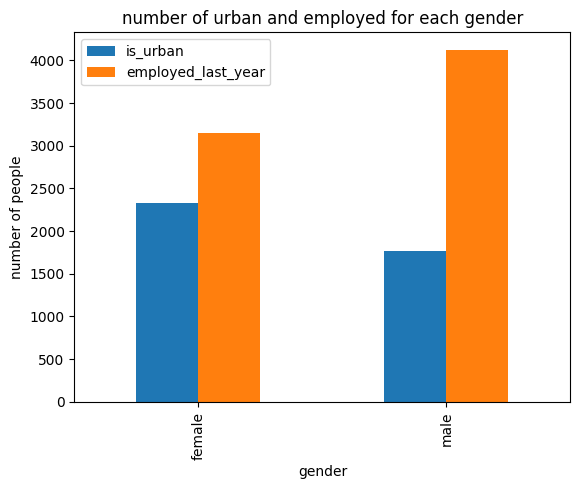

In [21]:
# Abbildungen von Gruppen
df.groupby('gender')[['is_urban', 	'employed_last_year']].sum().plot.bar(title = 'number of urban and employed for each gender', 
                                                                          ylabel = 'number of people');

## 2 - Matplotlib

[<img src="bilder/matplot_title_logo.png"  width="400" height="300"  title="Matplotlib">](https://matplotlib.org/)

Pandas eignet sich gut für schnelle und standardisierte Visualisierungen. Sobald wir jedoch komplexere Grafiken benötigen, sind wir mit Matplotlib, dem Paket, das auch von Pandas verwendet wird, besser bedient. Mit Matplotlib sind wir wesentlich flexibler und können Grafiken leicht anpassen, Abbildungen nebeneinander stellen, Anmerkungen hinzufügen usw...
<br>
<br>
Der beste Weg, eine Abbildung zu erstellen, ist die [Matplotlib-Galerie](https://matplotlib.org/stable/gallery/index.html). Sie ist eine Sammlung verschiedener Diagrammtypen einschließlich des Quellcodes

In [8]:
import matplotlib.pyplot as plt
import numpy as np

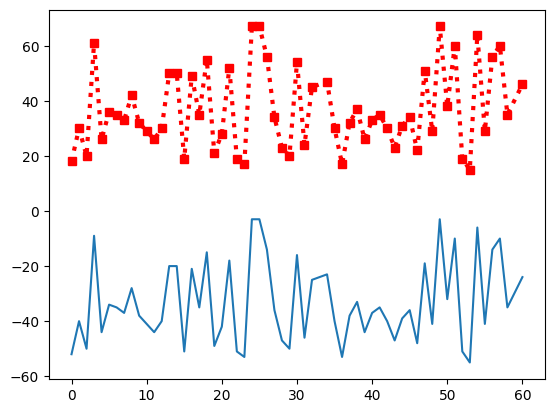

In [11]:
# Eine einfache Linien Abbildung
plt.plot(df['age'].loc[:60]-70);

# Eine angepasste Linien Abbildung
plt.plot(df['age'].loc[:60], 
         color="r", # fabre
         linestyle=':', # linientyp
         marker='s', # zeichentyp
         linewidth=3 # linienbreite
        );

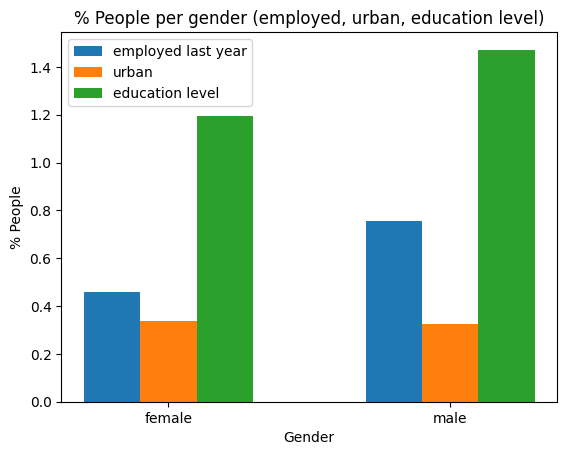

In [12]:
# Die Anpassung kann endlich komplizierter werden...
X_axis = np.arange(len(df.groupby('gender')[['is_urban', 	'employed_last_year']].sum().index)) 

plt.bar(X_axis-0.2, df.groupby('gender')['employed_last_year'].mean(), 0.2, label='employed last year');
plt.bar(X_axis, df.groupby('gender')['is_urban'].mean(), 0.2, label='urban');
plt.bar(X_axis+0.2, df.groupby('gender')['education_level'].mean(), 0.2, label='education level');

plt.xticks(X_axis, df.groupby('gender')[['is_urban', 	'employed_last_year']].sum().index) 
plt.xlabel("Gender") 
plt.ylabel("% People") 
plt.legend()
plt.title("% People per gender (employed, urban, education level)") ;


It is frequently useful to present charts side by side. The best way to do this is with the plt.subplots method. It returns a plot area (fig) as well as an axes object (axs) with the specified dimensions. The axes dimensions correspond to the placement of the subcharts. 

Note: there is a tricky naming convention in Matplotlib. Axes refers to a subchart object. Axis refers to the the axis of a chart


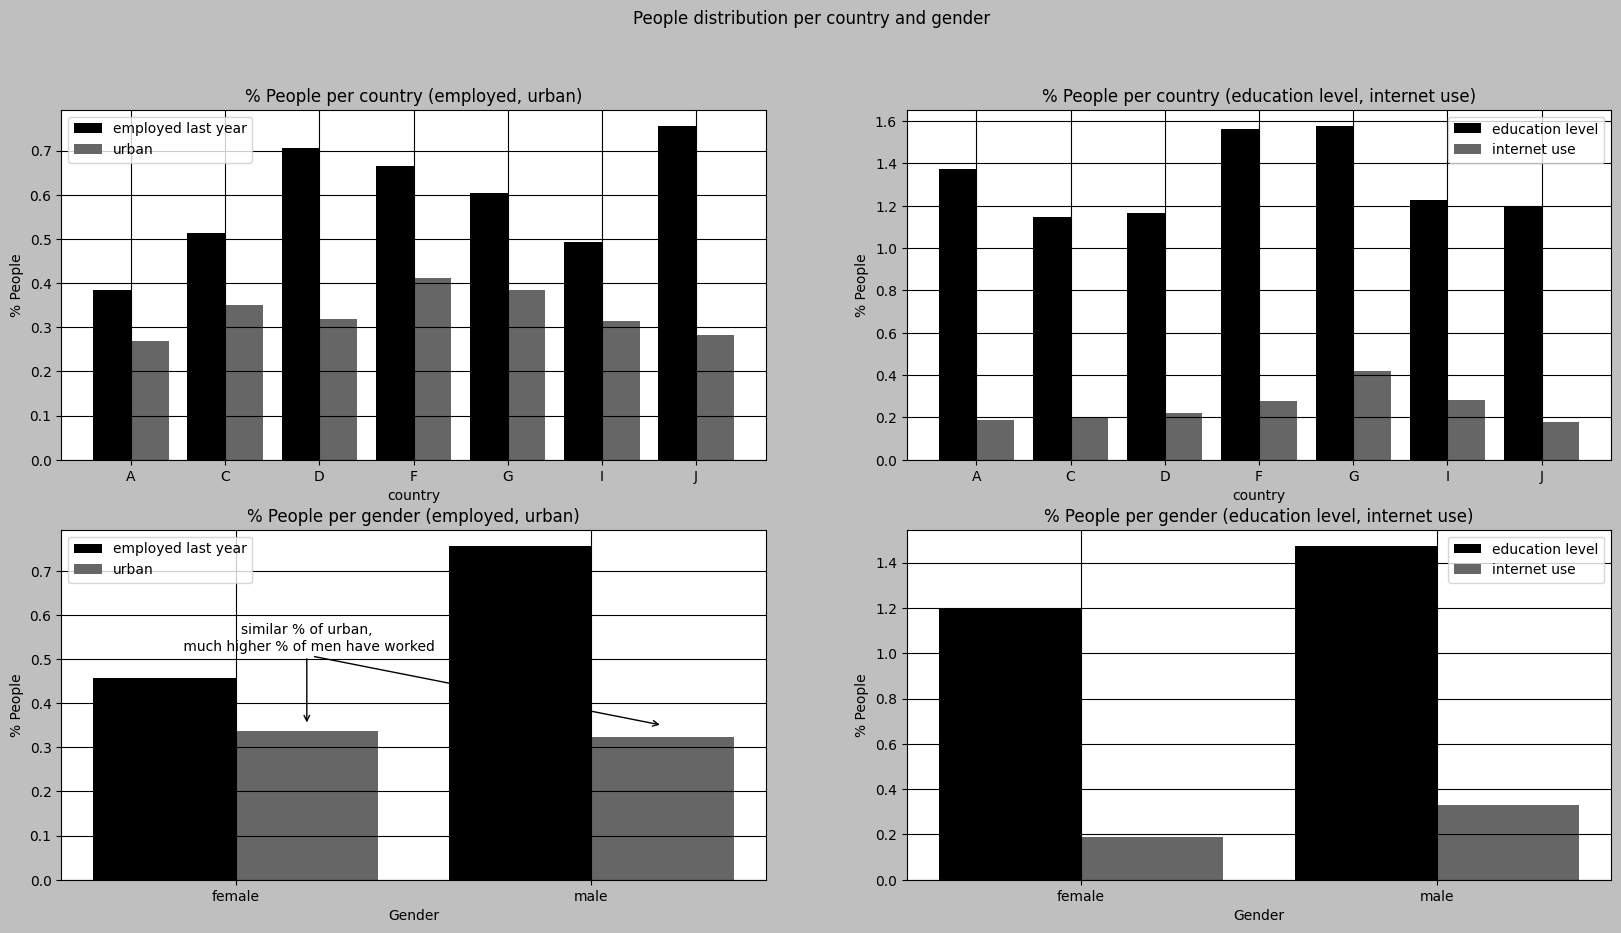

In [46]:

# Anstatt jede Farbe manuell auszuwählen, können wir eine Voreinstellung plt.style.context aufrufen. 
# Es gibt zum Beispiel einen tollen Graustufenstil, der für wissenschaftliche Publikationen sehr nützlich ist 
with plt.style.context('grayscale'):

    # Erstellung von eine 20x10 gröss Plotbereich mit 2 Spalten von 2 Diagrammen
    fig, axs = plt.subplots(2,2,figsize=(20,10))
    
    # Um alle Balken sichtbar zu machen, müssen wir sie von der Mitte aus verschieben. 
    # Daher erstellen wir diese X_axis-Variable mit den zentrierten Positionen, damit wir sie später verschieben können
    X_axis = np.arange(len(df.groupby('country')[['is_urban', 	'employed_last_year']].sum().index)) 

    # axs[0][0] ist das linke obere Unterdiagramm
    # wir können es anpassen, in eine sehr ähnliche Weise zu was wir schon gemacht haben
    axs[0][0].bar(X_axis-0.2, df.groupby('country')['employed_last_year'].mean(), 0.4, label='employed last year');
    axs[0][0].bar(X_axis+0.2, df.groupby('country')['is_urban'].mean(), 0.4, label='urban');

    # manche Methoden heissen bei Axes set_***. Z.B., statt xticks(), wir mussen set_xticks() schreiben
    axs[0][0].set_xticks(X_axis, df.groupby('country')[['is_urban', 	'employed_last_year']].sum().index) 
    axs[0][0].set_xlabel("country") 
    axs[0][0].set_ylabel("% People") 
    axs[0][0].legend()
    axs[0][0].grid()
    axs[0][0].set_title("% People per country (employed, urban)") ;
    

    # axs[0][1] ist das rechte obere Unterdiagramm    
    axs[0][1].bar(X_axis-0.2, df.groupby('country')['education_level'].mean(), 0.4, label='education level');
    axs[0][1].bar(X_axis+0.2, df.groupby('country')['can_use_internet'].mean(), 0.4, label='internet use');
    
    axs[0][1].set_xticks(X_axis, df.groupby('country')[['is_urban', 	'employed_last_year']].sum().index) 
    axs[0][1].set_xlabel("country") 
    axs[0][1].set_ylabel("% People") 
    axs[0][1].legend()
    axs[0][1].grid()
    axs[0][1].set_title("% People per country (education level, internet use)") ;
    
    # Um alle Balken sichtbar zu machen, müssen wir sie von der Mitte aus verschieben. 
    # Daher erstellen wir diese X_axis-Variable mit den zentrierten Positionen, damit wir sie später verschieben können    
    X_axis = np.arange(len(df.groupby('gender')[['is_urban', 	'employed_last_year']].sum().index)) 

    # axs[1][0] ist das linke untere Unterdiagramm      
    axs[1][0].bar(X_axis-0.2, df.groupby('gender')['employed_last_year'].mean(), 0.4, label='employed last year');
    axs[1][0].bar(X_axis+0.2, df.groupby('gender')['is_urban'].mean(), 0.4, label='urban');
    
    axs[1][0].set_xticks(X_axis, df.groupby('gender')[['is_urban', 	'employed_last_year']].sum().index) 
    axs[1][0].set_xlabel("Gender") 
    axs[1][0].set_ylabel("% People") 
    axs[1][0].legend()
    axs[1][0].grid()
    axs[1][0].set_title("% People per gender (employed, urban)") 
    
    axs[1][0].annotate('similar % of urban,\n much higher % of men have worked',
             xy=(0.2, 0.35),
             xytext=(0.2, 0.52),
             ha='center',
             arrowprops=dict(facecolor='black', arrowstyle='->'))
    
    # axs[1][0].annotate('',
    #          xy=(1.5, 0.35),
    #          xytext=(0.3, 0.55),
    #          ha='center',
    #          arrowprops=dict(facecolor='black', arrowstyle='->', edgecolor='white'))
    
    axs[1][0].annotate(' ',
             xy=(1.2, 0.35),
             xytext=(0.2, 0.5),
             ha='center',
             arrowprops=dict(facecolor='black', arrowstyle='->', edgecolor='white'))
    
    # axs[1][1] ist das rechte untere Unterdiagramm        
    axs[1][1].bar(X_axis-0.2, df.groupby('gender')['education_level'].mean(), 0.4, label='education level');
    axs[1][1].bar(X_axis+0.2, df.groupby('gender')['can_use_internet'].mean(), 0.4, label='internet use');
    
    axs[1][1].set_xticks(X_axis, df.groupby('gender')[['is_urban', 	'employed_last_year']].sum().index) 
    axs[1][1].set_xlabel("Gender") 
    axs[1][1].set_ylabel("% People") 
    axs[1][1].legend()
    axs[1][1].grid()
    axs[1][1].set_title("% People per gender (education level, internet use)") ;

    # wir behalten immernoch Zugriff zu die ganze Abbildung
    # wir können ein gesammter Title setzen
    fig.suptitle('People distribution per country and gender')

    # um die ganze Abbildung als jpg zu speichern...
    plt.savefig('% people breakdowns.jpg')

## 3 - Seaborn

[<img src="bilder/seaborn.png"  width="400" height="300"  title="Seaborn">](https://seaborn.pydata.org/)


Seaborn ist eine Python-Bibliothek, die auf Matplotlib aufbaut und speziell für die Erstellung ansprechender und aussagekräftiger statistischer Grafiken entwickelt wurde. Sie bietet eine einfach zu bedienende Schnittstelle für die Visualisierung von Daten und ermöglicht es, komplexe Diagramme mit nur wenigen Zeilen Code zu erstellen. Seaborn bietet eine Vielzahl von Diagrammtypen und Stilvorlagen, um die Darstellung Ihrer Daten schnell anzupassen und professionelle Ergebnisse zu erzielen.


In [16]:
import seaborn as sns

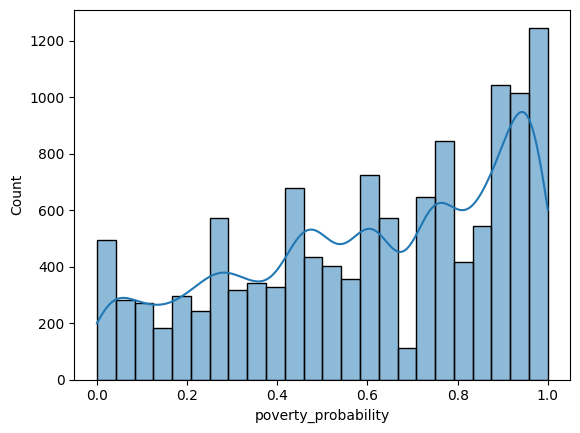

In [27]:
# in ein Histogramm, können wir sehr einfach eine "kernel density funtion" aufsetzen
sns.histplot(df['poverty_probability'], kde=True);

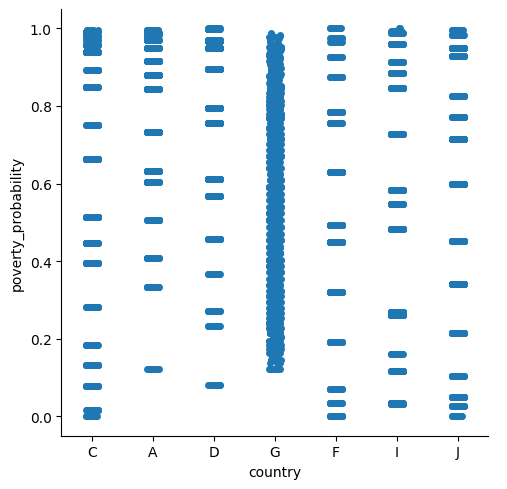

In [48]:
# verschiedene kategorisch Diagramme
sns.catplot(x ='country' , y='poverty_probability' , data=df);

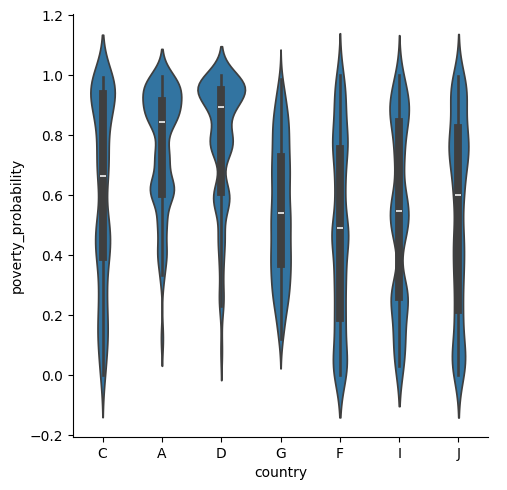

In [47]:
sns.catplot(x ='country' , y='poverty_probability' , data=df, kind="violin");

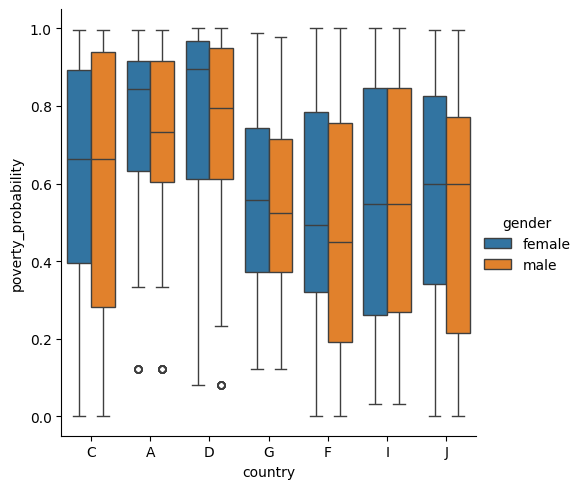

In [29]:
# mit der "hue" Parameter, können wir eine Variable vergleichen
sns.catplot(x ='country' , y='poverty_probability' , data=df, kind="box", hue='gender');

Falls wir mehr Variablen vergleichen möchten, können wir die [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) Methode verwenden

/tmp/ipykernel_4681/1736145417.py:5: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  sizes=(10, 50), data=df[:1000]);


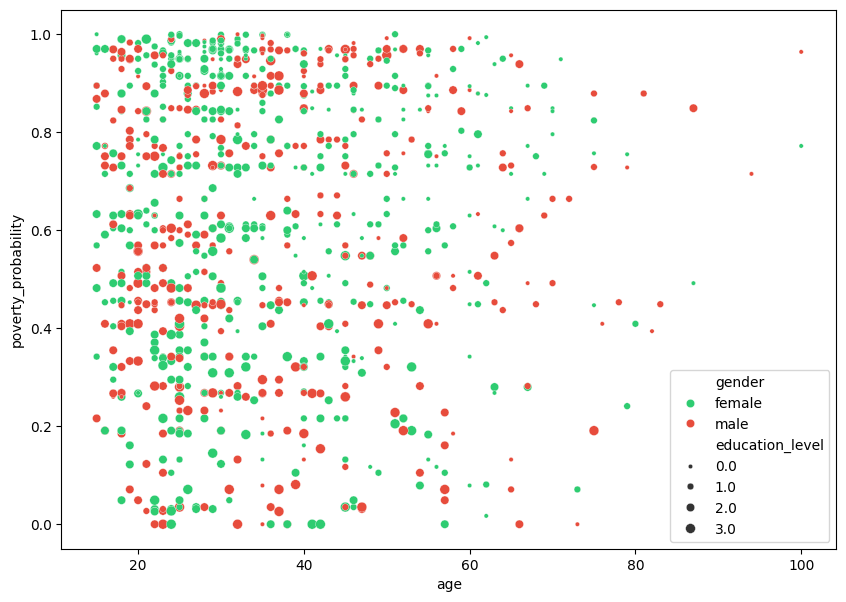

In [49]:
#  wir können die Größe eines Punktes leicht mit den Werten einer Variablen indexieren
plt.figure(figsize=(10, 7))
sns.scatterplot(x="age", y="poverty_probability", hue='gender', size="education_level",
                palette=sns.color_palette(["#2ecc71", "#e74c3c"]),
                sizes=(10, 50), data=df[:1000]);

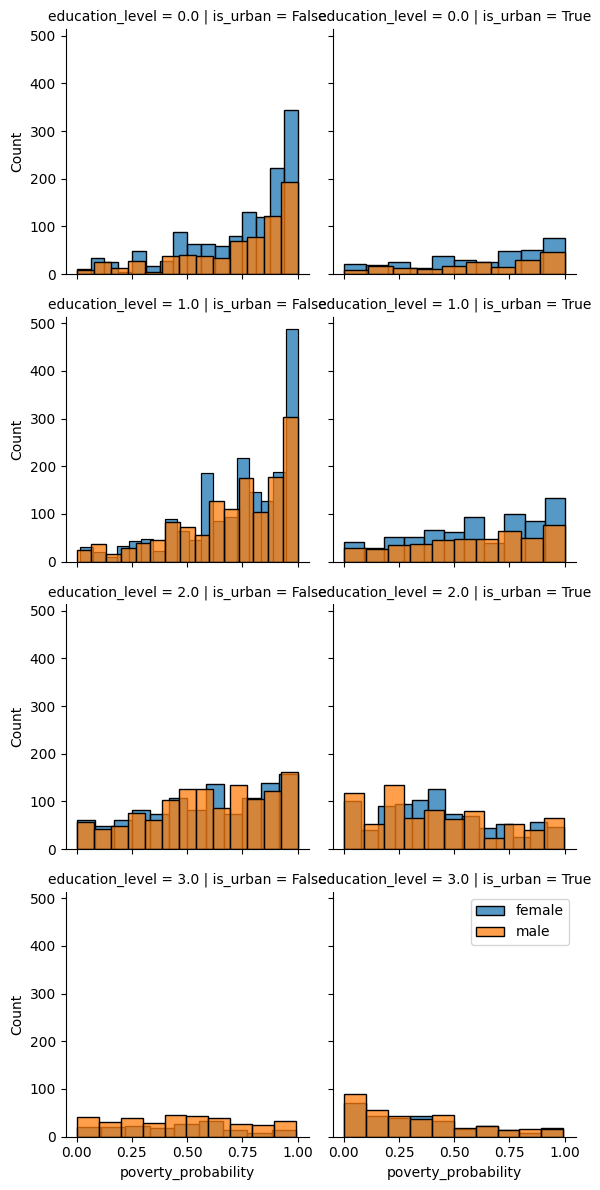

In [31]:
# wir erstellen das Gitter, und sagen explizit was kommt in die Spalten und Zeilen
g = sns.FacetGrid(df, col="is_urban", row="education_level", hue="gender") 

# Dann können wir die Diagrammtyp wählen
g.map(sns.histplot, "poverty_probability");
plt.legend();

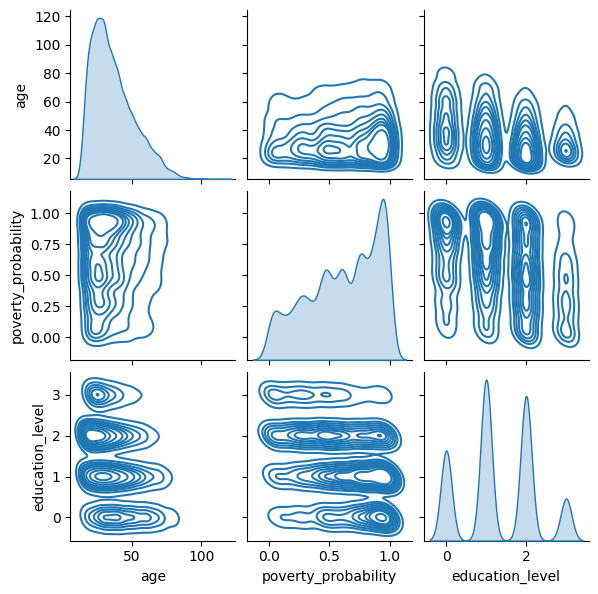

In [52]:
# oder wir können ein pairplot nutzen
sns.pairplot(data = df[["age", "poverty_probability",  "education_level"]], height=2, kind='kde'); # , hue='gender'

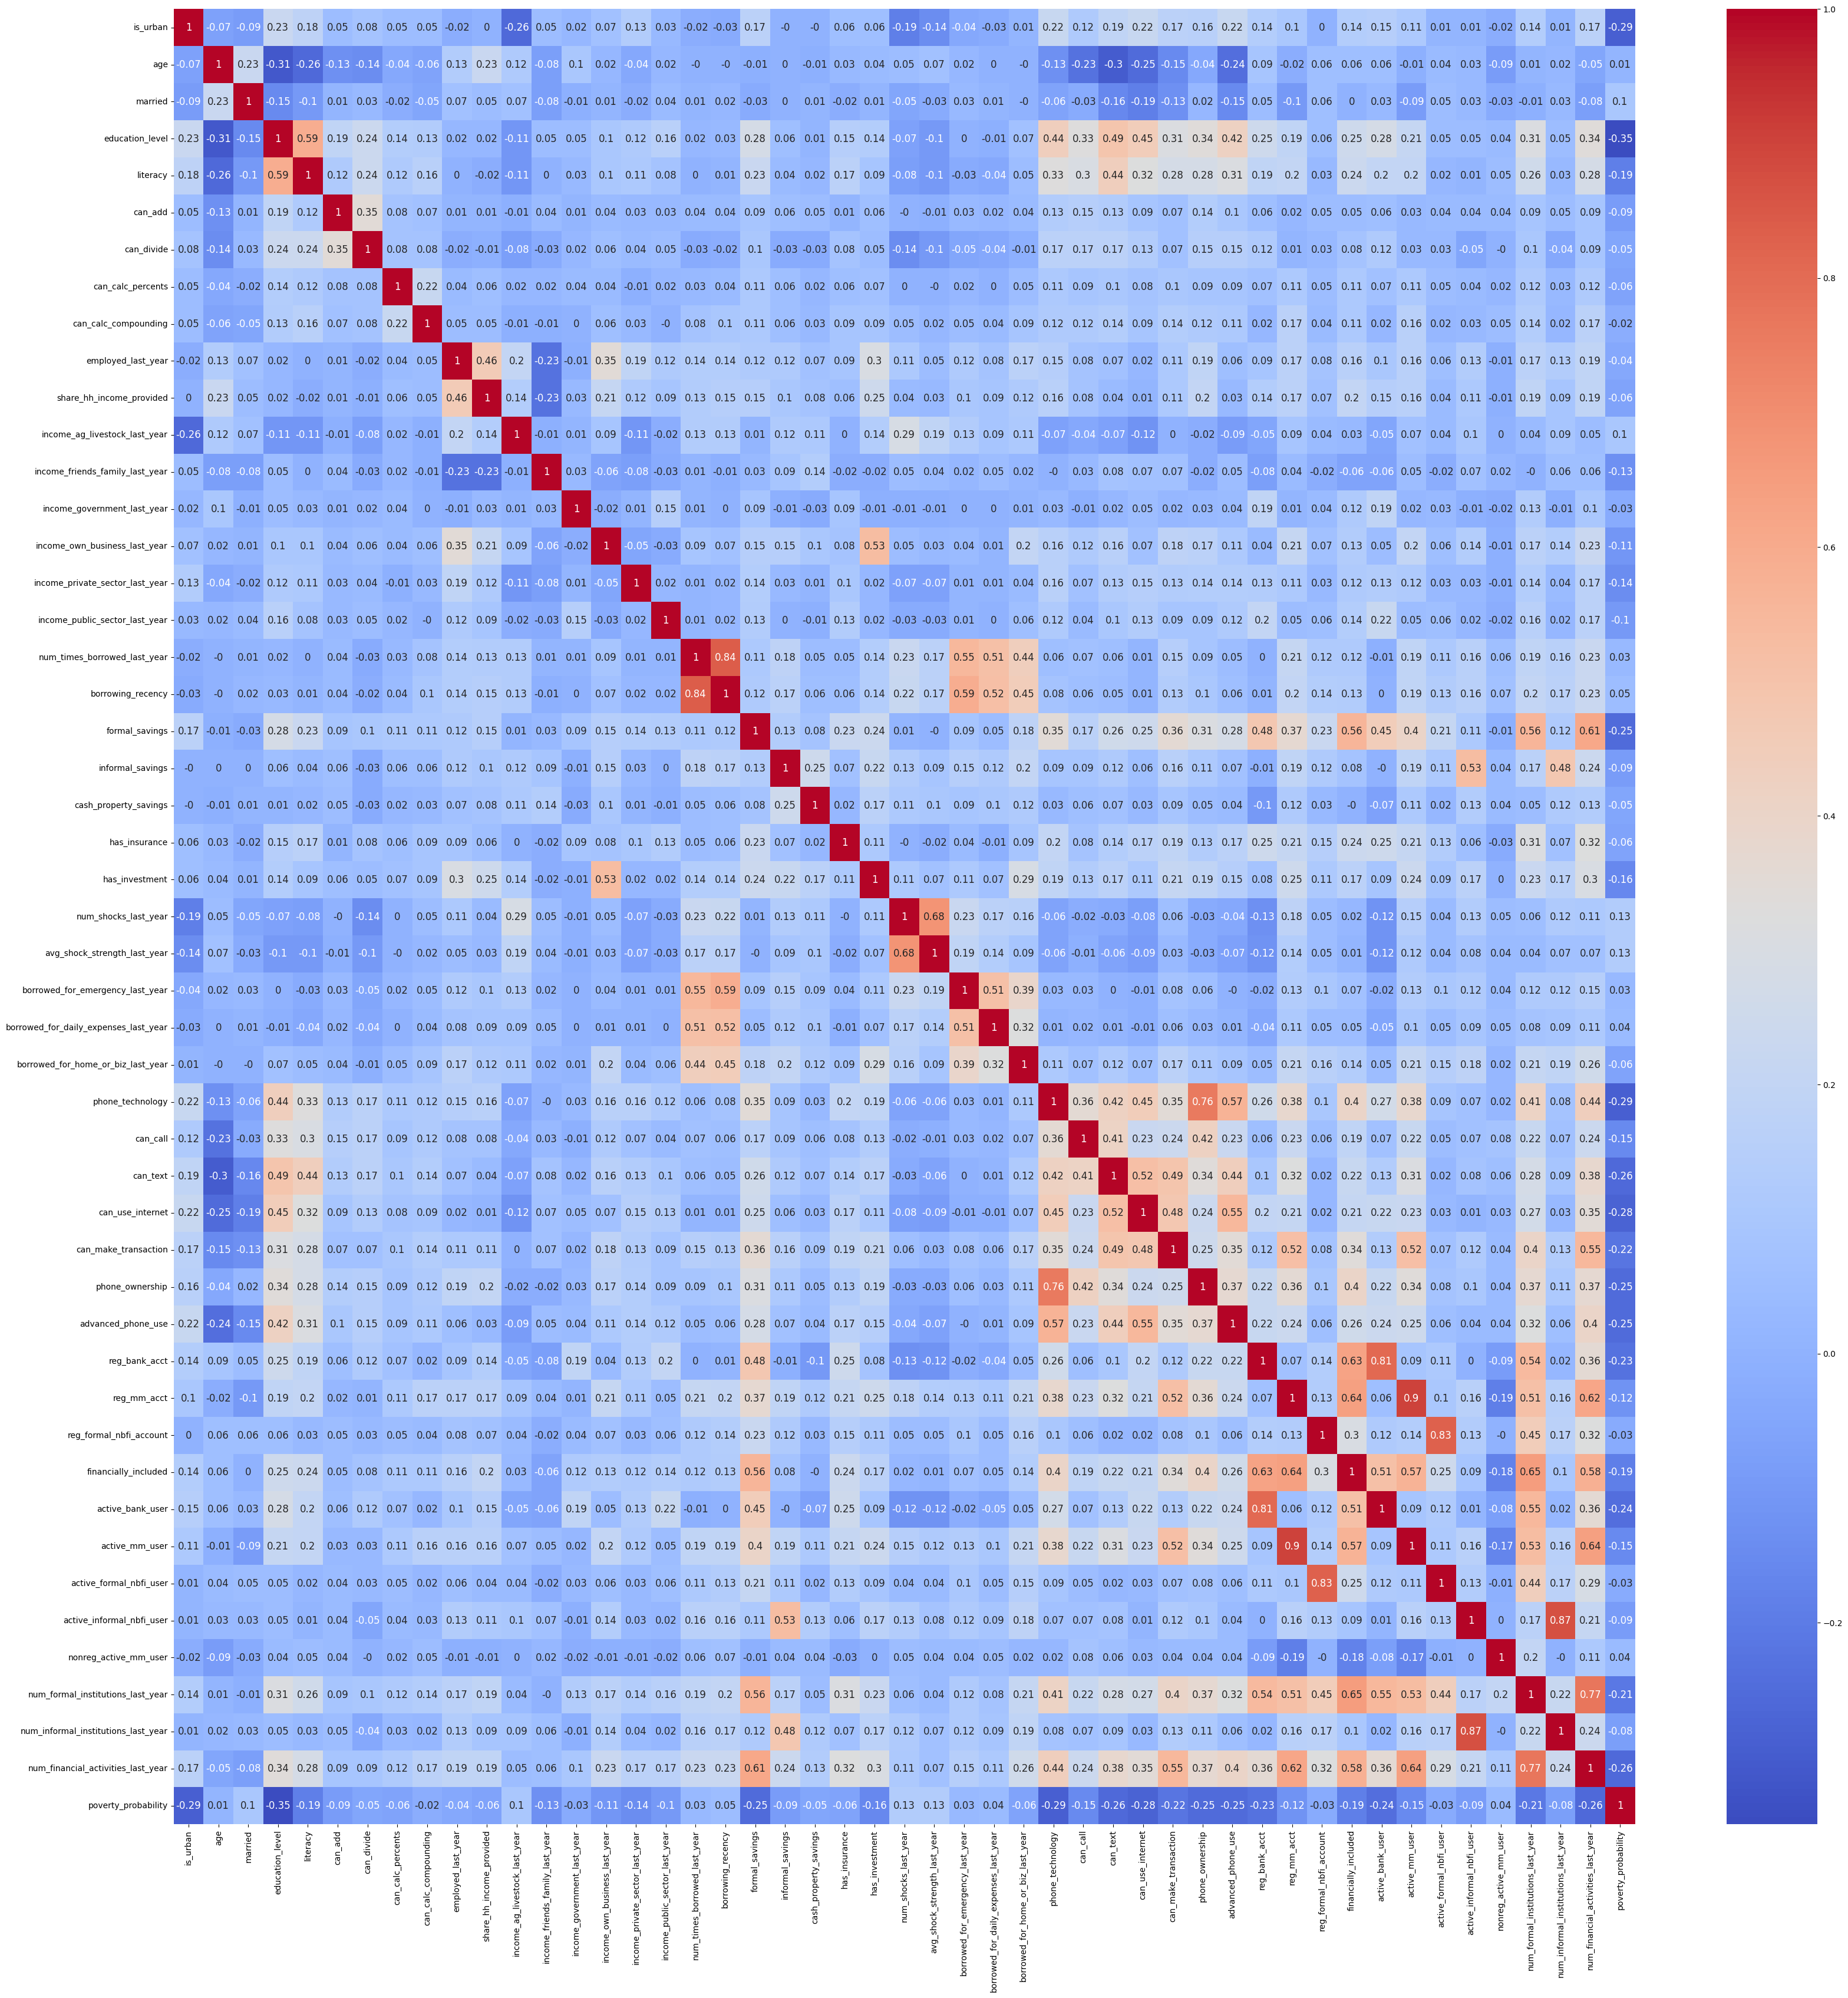

In [46]:
# das Heatmap bietet eine tabellarische Form mit Farben auf der Grundlage der Intensität
plt.figure(figsize = (40,40))
sns.heatmap(round(df.drop(columns = ['country','gender','religion' 	,'relationship_to_hh_head','employment_category_last_year','employment_type_last_year']).corr(),2), cmap = "coolwarm", annot = True, annot_kws = {"size":12});